# WeatherPy

## Observations:
* Observation 1 : Temperature decreases as you move north from the equator in the Northern Hemisphere in strongly linear                         fashion. Temperature decreases as you move south from the equator in the Southern Hemisphere in a weak linear                   fashion. This makes sense because temperatures are higher closer to the equator.
* Observation 2 : There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a                       a majority of the cities have cloudiness near 0, 70, and 100% in the northern hemisphere.
* Observation 3 : There is no strong relationship between latitude and wind speed. Wind speed tends to be generally be betweeen                   0 and 15 mph regardless of latitude
* Observation 4: There is no strong relationship between latitude and humidity. However there is a slightly larger cluster of                    northern hemisphere cities with high humidity (above 60% humidity)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Install citypy
# !pip install citipy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
    
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url for open weather api
weather_url = 'http://api.openweathermap.org/data/2.5/weather?'

# Initializing counters
city_count = 0
set_count = 1

# Setting up empty lists to retreive data from the open weather json response
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_found = []

print('Beginning Data Retrieval')
print('-----------------------------')

# Making API calls to Open weather API for each city retreived
# Using Try and Except to retreive the data from the json response and store in lists
for ind_city in cities:
    weather_city_url = weather_url + 'q=' + ind_city + '&appid=' + weather_api_key + '&units=Imperial'
    weather_data = requests.get(weather_city_url).json()
    
    try:
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])    # Farenheit
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all']) 
        wind_speed.append(weather_data['wind']['speed'])     # miles/hour
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        city_found.append(weather_data['name'])
        
        print(f'Processing Record {city_count} of Set {set_count} | {ind_city}')
        
        city_count +=1
        if city_count == 49:
            print(f'Processing Record {city_count} of Set {set_count} | {ind_city}')
            set_count+=1
            city_count = 0
            
    except (KeyError, IndexError):
        print('City not found. Skipping..')  


print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
City not found. Skipping..
Processing Record 0 of Set 1 | puerto ayora
Processing Record 1 of Set 1 | pochutla
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | yaan
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | paamiut
Processing Record 9 of Set 1 | iberia
Processing Record 10 of Set 1 | gimli
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | camocim
Processing Record 13 of Set 1 | lewistown
Processing Record 14 of Set 1 | alta floresta
City not found. Skipping..
Processing Record 15 of Set 1 | mar del plata
City not found. Skipping..
Processing Record 16 of Set 1 | cap malheureux
Processing Record 17 of Set 1 | katsuura
City not found. Skipping..
Processing Record 18 of Set 1 | sept-iles
Processing Record 19 of Set 1 | dudinka
Proc

Processing Record 36 of Set 4 | pemangkat
Processing Record 37 of Set 4 | odweyne
Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | zhaoyang
Processing Record 40 of Set 4 | burnie
Processing Record 41 of Set 4 | mosquera
Processing Record 42 of Set 4 | fare
Processing Record 43 of Set 4 | verkhnevilyuysk
Processing Record 44 of Set 4 | north bend
City not found. Skipping..
Processing Record 45 of Set 4 | saint anthony
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | lappeenranta
Processing Record 49 of Set 4 | lappeenranta
Processing Record 0 of Set 5 | den helder
Processing Record 1 of Set 5 | mackay
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | corinto
Processing Record 4 of Set 5 | midland
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | berlevag
City not found. Skipping..
Processing Record 7 of Set 5 | vostok
Processing Record 8 of S

Processing Record 21 of Set 8 | kysyl-syr
Processing Record 22 of Set 8 | maniitsoq
Processing Record 23 of Set 8 | sinnamary
Processing Record 24 of Set 8 | jurado
Processing Record 25 of Set 8 | roebourne
City not found. Skipping..
Processing Record 26 of Set 8 | yining
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | biak
Processing Record 29 of Set 8 | lookan
Processing Record 30 of Set 8 | lazaro cardenas
City not found. Skipping..
Processing Record 31 of Set 8 | severo-kurilsk
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | poli
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | morondava
Processing Record 36 of Set 8 | margate
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | itarema
Processing Record 40 of Set 8 | oktyabrskiy
Processing Record 41 of Set 8 | red wing
Processing Record 42 of Set 8 | shelburne
Processing Record 43 of Set 8 | 

Processing Record 9 of Set 12 | vestmanna
Processing Record 10 of Set 12 | linkou
Processing Record 11 of Set 12 | lewiston
City not found. Skipping..
Processing Record 12 of Set 12 | sladkovo
Processing Record 13 of Set 12 | polazna
Processing Record 14 of Set 12 | betare oya
Processing Record 15 of Set 12 | gwadar
Processing Record 16 of Set 12 | tiksi
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating the city dataframe with the data retreived from the Open Weather API for each city
city_dataframe = pd.DataFrame({'City': city_found,
                              'Lat': latitude,
                              'Lng': longitude,
                              'Max Temp': max_temp,
                              'Humidity': humidity,
                              'Cloudiness': cloudiness,
                              'Wind Speed': wind_speed,
                              'Country': country,
                              'Date': date})
city_dataframe['Lat'] = round(city_dataframe['Lat'], 2)
city_dataframe['Lng'] = round(city_dataframe['Lng'], 2)
city_dataframe.to_csv(output_data_file, index=False)
city_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,73.54,88,66,10.00,EC,1624152237
1,Pochutla,15.74,-96.47,81.82,90,99,3.60,MX,1624152237
2,San Patricio,28.02,-97.52,85.95,67,67,12.44,US,1624152237
3,Cabo San Lucas,22.89,-109.91,96.80,72,5,17.27,MX,1624152238
4,Yaan,7.38,8.57,74.46,92,100,6.31,NG,1624152238


In [5]:
# Number of cities retreived
len(city_dataframe)

556

In [6]:
# Statistical data of the city dataframe
city_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,22.107788,17.770144,67.820953,70.696043,52.791367,7.718975,1.624152e+09
std,32.924262,89.700683,14.273368,21.270613,40.654151,5.393753,8.446556e+01
min,-54.800000,-175.200000,30.290000,7.000000,0.000000,0.000000,1.624152e+09
25%,-3.937500,-62.047500,57.410000,63.000000,8.000000,3.485000,1.624152e+09
50%,28.480000,23.030000,69.325000,75.000000,56.500000,6.410000,1.624152e+09
75%,49.890000,100.342500,79.107500,86.000000,98.000000,10.365000,1.624152e+09
max,78.220000,179.320000,115.700000,100.000000,100.000000,32.120000,1.624152e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [279]:
# If the max value for humidity in the dataset is above 100% - remove those records from the dataframe. Step repeated in the step below
# if (city_dataframe['Humidity'].max()) > 100:
#     city_dataframe = city_dataframe.loc[city_dataframe['Humidity'] <= 100, :]

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = city_dataframe.index
humidity_indices = index[city_dataframe['Humidity'] > 100]
humidity_indices_list = humidity_indices.tolist()
humidity_indices_list

[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_dataframe
for hum in humidity_indices_list:
    clean_city_data = clean_city_data.drop(hum, inplace = False)

print('Number of records : ' + str(len(clean_city_data)))
clean_city_data.head()

Number of records : 556


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,73.54,88,66,10.00,EC,1624152237
1,Pochutla,15.74,-96.47,81.82,90,99,3.60,MX,1624152237
2,San Patricio,28.02,-97.52,85.95,67,67,12.44,US,1624152237
3,Cabo San Lucas,22.89,-109.91,96.80,72,5,17.27,MX,1624152238
4,Yaan,7.38,8.57,74.46,92,100,6.31,NG,1624152238


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Getting the current date from time module 
now = time.localtime()
date = time.strftime("%m/%d/%y", now)
print ("Current date : " + date)

Current date : 06/20/21


## Latitude vs. Temperature Plot

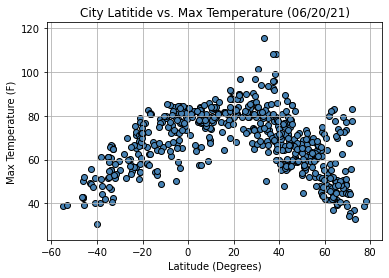

In [10]:
# Creating scatter plot between the latitude and maximum temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitide vs. Max Temperature ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Max Temp'].min() - 7, clean_city_data['Max Temp'].max() + 7)
plt.savefig('output_data/scatter_latvstemp.png')
plt.show();

### Explanation and Obervation - Latitude vs. Temperature Plot :
* The above graph is the scatter plot between the Latitude of the cities and the max temperature (F) recorded in the city on the day.
* We can see the maximum temperature increase with latitude for cities with latitude less than 0 degrees as move towards the equator.
* We can see the maximum temperature decrease with latitude for cities with latitude greater than 0 degrees as we move way form the equator.

## Latitude vs. Humidity Plot

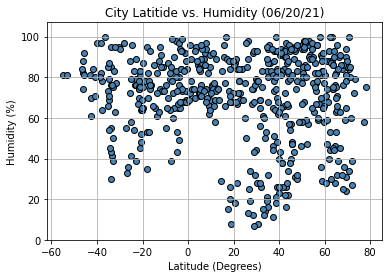

In [11]:
# Creating scatter plot between the latitude and humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitide vs. Humidity ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Humidity'].min() - 7, clean_city_data['Humidity'].max() + 7)
plt.savefig('output_data/scatter_latvshum.png')
plt.show();

### Explanation and Obervation - Latitude vs. Humidity Plot :
* The above graph is the scatter plot between the Latitude of the cities and the humidity (%) recorded in the city on the day.
* We cannot really see any relation/trend between the latitudes and the humidity
* We can see that the humidity for most of the cities below 0 degree latitude is higher, above 30%. Whereas, for cities above 0 degrees, there are a handful of cities with humidity less than 40%.

## Latitude vs. Cloudiness Plot

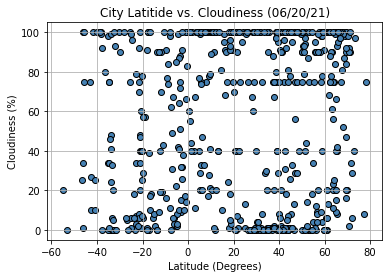

In [12]:
# Creating scatter plot between the latitude and cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitide vs. Cloudiness ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Cloudiness'].min() - 5, clean_city_data['Cloudiness'].max() + 5)
plt.savefig('output_data/scatter_latvscloud.png')
plt.show();

### Explanation and Obervation - Latitude vs. Cloudiness :
* The above graph is the scatter plot between the Latitude of the cities and the cloudiness(%) recorded in the city on the day.
* We cannot really see any relation/trend between the latitudes and the cloudiness recorded in the cities
* It can be seen that many cities have cloudiness recorded at 100%, 0% and 75% from both cities above and below 0 degree latitude.

## Latitude vs. Wind Speed Plot

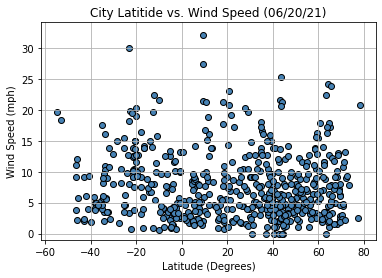

In [13]:
# Creating scatter plot between the latitude and wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker = 'o', facecolor='steelblue', edgecolor ='black', alpha=1)
plt.grid()
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitide vs. Wind Speed ({date})')
plt.xlim(clean_city_data['Lat'].min() - 7, clean_city_data['Lat'].max() + 7)
plt.ylim(clean_city_data['Wind Speed'].min()-1, clean_city_data['Wind Speed'].max()+2)
plt.savefig('output_data/scatter_latvswindspd.png')
plt.show();

### Explanation and Obervation - Latitude vs. Wind Speed :
* The above graph is the scatter plot between the Latitude of the cities and the wind speed (miles per hour) recorded in the     city on the day.
* We cannot really see any relation/trend between the latitudes and the wind speed recorded in the cities
* We can see that most of the cities have wind speeds below 15mph, regardless of the latitude

## Linear Regression

In [14]:
# Creating a new dataframe for cities in the northern hemisphere (Latitude degrees >= 0)
city_dataframe_north = clean_city_data.loc[city_dataframe['Lat'] >= 0, :]
print('Number of cities in northern hemisphere : ' + str(len(city_dataframe_north)))
city_dataframe_north.head()

Number of cities in northern hemisphere : 394


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Pochutla,15.74,-96.47,81.82,90,99,3.60,MX,1624152237
2,San Patricio,28.02,-97.52,85.95,67,67,12.44,US,1624152237
3,Cabo San Lucas,22.89,-109.91,96.80,72,5,17.27,MX,1624152238
4,Yaan,7.38,8.57,74.46,92,100,6.31,NG,1624152238
6,Ostrovnoy,68.05,39.51,50.59,76,100,9.22,RU,1624152238


In [15]:
# Creating a new dataframe for cities in the southern hemisphere (Latitude degrees < 0)
city_dataframe_south = clean_city_data.loc[city_dataframe['Lat'] < 0, :]
print('Number of cities in southern hemisphere : ' + str(len(city_dataframe_south)))
city_dataframe_south.head()

Number of cities in southern hemisphere : 162


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,73.54,88,66,10.00,EC,1624152237
5,Busselton,-33.65,115.33,55.09,85,24,10.89,AU,1624152238
11,Ushuaia,-54.80,-68.30,38.86,81,20,19.57,AR,1624152240
12,Camocim,-2.90,-40.84,77.16,84,15,10.11,BR,1624151955
14,Alta Floresta,-9.88,-56.09,78.98,55,91,0.65,BR,1624152241


In [16]:
# Setting up a function which would create the scatter plot for the various criteria in the northern and southern hemisphere
def linear_regression(xcord, ycord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xcord, ycord)

    regress_values = xcord * slope + intercept

    plt.scatter(xcord, ycord, marker = 'o', facecolor='steelblue', alpha=0.9)
    plt.plot(xcord,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.legend()
    return(slope, intercept, rvalue)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6549338967638101


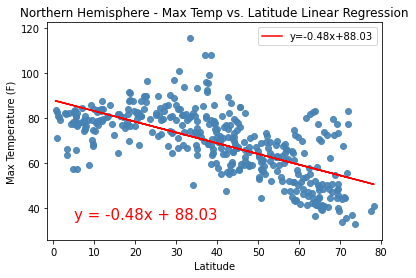

In [17]:
# Passing the values for the latitude and maximum temperature for the northern hemisphere
x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Max Temp']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvstemp.png')
plt.show();


### Latitude vs. Temperature Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the max temperature (F) recorded in the cities on the day.
* We can see the maximum temperature decreases with increasing latitude for cities in the northern hemisphere as we move away form the equator. 
* The linear regression line of best fit has a negative slope and we can see the pearson's correlation coefficient (r-value) is close to -1, which shows a negative correlation between the maximum temperature and latitude in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7676975696262816


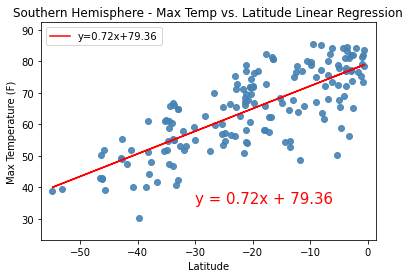

In [18]:
# Passing the values for the latitude and maximum temperature for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Max Temp']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvstemp.png')
plt.show();

### Latitude vs. Temperature Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the max temperature (F) recorded in the cities on the day.
* We can see the maximum temperature increase with latitude for cities in the southern hemisphere as move towards the equator. 
* The linear regression line of best fit has a positive slope and we can see the pearson's correlation coefficient is closer to 1, which shows a positive correlation between the maximum temperature and latitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05169011672417314


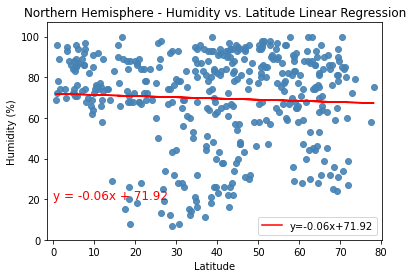

In [19]:
# Passing the values for the latitude and Humidity for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Humidity']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(0,20),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvshum.png')
plt.show();

### Latitude vs. Humidity Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Humidity (%) recorded in the cities on the day.
* We can see there is not much of a relation between the humidity and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak negative correlation between the humidity and latitude in the northern hemisphere.
* Most of the cities have higher humidity between 60-100%

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026921910853291365


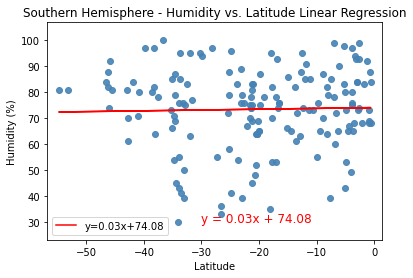

In [20]:
# Passing the values for the latitude and Humidity for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Humidity']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvshum.png')
plt.show();

### Latitude vs. Humidity Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Humidity (%) recorded in the cities on the day.
* We can see there is not much of a relation between the humidity and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak positive correlation between the humidity and latitude in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0316047863274514


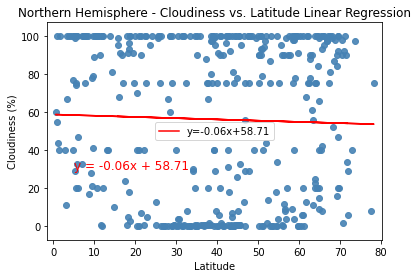

In [21]:
# Passing the values for the latitude and Cloudiness for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Cloudiness']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvscloud.png')
plt.show();

### Latitude vs. Cloudiness Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Cloudiness (%) recorded in the cities on the day.
* We can see there is not much of a relation between the cloudiness and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak negative correlation between the cloudiness and latitude in the northern hemisphere.
* We can see many of the cities having cloudiness at 0, 75 and 100%

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02684621986105729


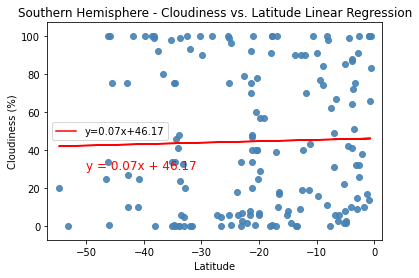

In [22]:
# Passing the values for the latitude and Cloudiness for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Cloudiness']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 7, y_value.max() + 7)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvscloud.png')
plt.show();

### Latitude vs. Cloudiness Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Cloudiness (%) recorded in the cities on the day.
* We can see there is not much of a relation between the cloudiness and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak positive correlation between the cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.003955392972509343


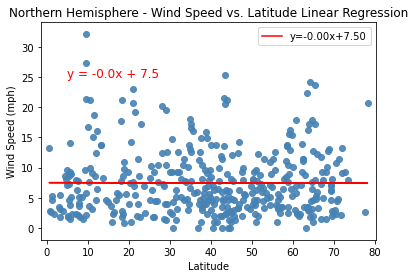

In [23]:
# Passing the values for the latitude and Wind Speed for the northern hemisphere

x_value = city_dataframe_north['Lat']
y_value = city_dataframe_north['Wind Speed']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 2, y_value.max() + 2)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(5,25),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_north_latvswind.png')
plt.show();

### Latitude vs. Wind Speed Linear Regression Plot for Northern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the northern hemisphere and the Wind Speed (mph) recorded in the cities on the day.
* We can see there is not much of a relation between the wind speed and the latitude for cities in the northern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak negative correlation between the wind speed and latitude in the northern hemisphere.
* Most of the cities have wind spped recorded at below 15mph regradless of the latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10661512337569097


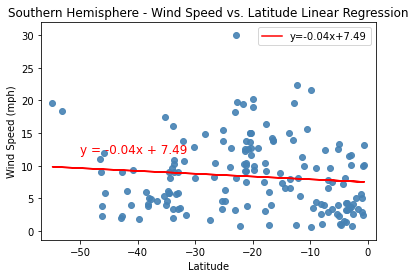

In [24]:
# Passing the values for the latitude and Wind Speed for the southern hemisphere

x_value = city_dataframe_south['Lat']
y_value = city_dataframe_south['Wind Speed']

result = linear_regression(x_value, y_value)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlim(x_value.min() - 2, x_value.max() + 2)
plt.ylim(y_value.min() - 2, y_value.max() + 2)

line_eq = "y = " + str(round(result[0],2)) + "x + " + str(round(result[1],2))
plt.annotate(line_eq,(-50,12),fontsize=12,color="red")

print('The r-value is: '+ str(result[2]))
plt.savefig('output_data/linear_south_latvswind.png')
plt.show();

### Latitude vs. Wind Speed Linear Regression Plot for Southern Hemisphere :
* The above graph is the linear regression model between the Latitude of the cities in the southern hemisphere and the Wind Speed (mph) recorded in the cities on the day.
* We can see there is not much of a relation between the wind speed and the latitude for cities in the southern hemisphere. 
* The linear regression line of best fit has a slope close to 0 and we can see the pearson's correlation coefficient is closer to 0, which shows a weak negative correlation between the wind speed and latitude in the southern hemisphere.